# SymPyで代数と式を計算する
## 式の記号と記号演算を定義する

$2x + 1$

$2xy$

$2x^2$ 

$(x+2)(y+3)$

In [4]:
import sys
!{sys.executable} -m pip install sympy

  Using cached https://files.pythonhosted.org/packages/dd/f6/ed485ff22efdd7b371d0dbbf6d77ad61c3b3b7e0815a83c89cbb38ce35de/sympy-1.3.tar.gz


  Using cached https://files.pythonhosted.org/packages/7a/05/b3d1472885d8dc0606936ea5da0ccb1b4785682e78ab15e34ada24aea8d5/mpmath-1.0.0.tar.gz


  Running setup.py bdist_wheel for sympy ... 

-

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 done
  Stored in directory: /Users/k2works/Library/Caches/pip/wheels/6c/59/86/478e3c0f298368c119095cc5985dedac57c0e35a85c737f823


  Running setup.py bdist_wheel for mpmath ... 

-

 \

 done
  Stored in directory: /Users/k2works/Library/Caches/pip/wheels/33/15/0f/9ca5f2ad88a5456803098daa189f382408a81556aa209e97ff


Successfully built sympy mpmath


In [10]:
import unittest
from sympy import Symbol
from sympy import symbols


class TestSymPy(unittest.TestCase):
    def test_01(self):
        x = Symbol('x')
        expect = x + x + 1
        self.assertEqual(expect, 2 * x + 1)

    def test_02(self):
        a = Symbol('x')
        expect = a + a + 1
        self.assertEqual(expect, 2 * a + 1)

    def test_03(self):
        x = Symbol('x')
        y = Symbol('y')
        s = x * y + x * y
        self.assertEqual(s, 2 * x * y)

    def test_04(self):
        x = Symbol('x')
        y = Symbol('y')
        p = x * (x + x)
        self.assertEqual(p, 2 * x ** 2)

        x, y = symbols('x,y')
        p = x * (x + x)
        self.assertEqual(p, 2 * x ** 2)

    def test_05(self):
        x = Symbol('x')
        y = Symbol('y')
        p = (x + 2) * (x + 3)
        self.assertEqual(p, (x + 2) * (x + 3))

        x, y = symbols('x,y')
        p = (x + 2) * (x + 3)
        self.assertEqual(p, (x + 2) * (x + 3))


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.

.

.

.

.


----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK


## 式を扱う
### 式の因数分解と展開

$x^2-y^2$ = $(x-y)(x+y)$

$x3 + 3x^2y + 3xy^2 + y^3$ = $(x + y)^3$

$x + y + xy$ = $xy + x + y$

In [12]:
import unittest
from sympy import Symbol
from sympy import factor, expand


class TestSymPy(unittest.TestCase):
    def test_01(self):
        x = Symbol('x')
        y = Symbol('y')
        expr = x ** 2 - y ** 2
        self.assertEqual(factor(expr), (x - y) * (x + y))
        
    def test_02(self):
        x = Symbol('x')
        y = Symbol('y')
        expr = x**2 - y**2
        factors = factor(expr)
        self.assertEqual(expand(factors), x**2 - y**2)
        
    def test_03(self):
        x = Symbol('x')
        y = Symbol('y')
        expr = x**3 + 3*x**2*y + 3*x*y**2 + y**3
        factors = factor(expr)
        self.assertEqual(factors,(x + y)**3)
        self.assertEqual(expand(factors),x**3 + 3*x**2*y + 3*x*y**2 + y**3)

    def test_04(self):
        x = Symbol('x')
        y = Symbol('y')
        expr = x + y + x*y
        self.assertEqual(factor(expr), x*y + x + y)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.

.

.

.


----------------------------------------------------------------------
Ran 4 tests in 0.013s

OK


### プリティプリント

$x^2 + 2xy + y^2$

$2x^2 + 2x + 1$

$1 + 2x + 2x^2$

In [14]:
from sympy import Symbol
from sympy import pprint
from sympy import init_printing

if __name__ == '__main__':
    x = Symbol('x')
    y = Symbol('y')
    expr = x*x + 2*x*y + y*y
    print(expr)
    pprint(expr, use_unicode=True)
    expr = 1 + 2*x + 2*x**2
    pprint(expr, use_unicode=True)
    init_printing(order='rev-lex')
    pprint(expr, use_unicode=True)

x**2 + 2*x*y + y**2
 2            2
x  + 2⋅x⋅y + y 
   2          
2⋅x  + 2⋅x + 1
   2          
2⋅x  + 2⋅x + 1


#### 級数を出力する

$x + \frac{x^2}{2} + \frac{x^3}{3} + \frac{x^4}{4} + ... + \frac{x^n}{n}$

In [16]:
import unittest
from sympy import Symbol, pprint, init_printing

'''
級数を出力
x + x**2 + x**3 + ... + x**n
    ---    ---          ---
     2      3            n
xの値で級数の値を計算
'''
def print_series(n):
    # 出力を逆順に初期化
    init_printing(order='rev-lex')
    x = Symbol('x')
    series = x
    for i in range(2, n + 1):
        series = series + (x ** i) / i
    pprint(series)
    return series


class TestPrintSeries(unittest.TestCase):
    def test_01(self):
        x = Symbol('x')
        self.assertEqual(print_series(1), x)
        self.assertEqual(print_series(2), x ** 2 / 2 + x)
        self.assertEqual(print_series(3), x ** 3 / 3 + x ** 2 / 2 + x)
        self.assertEqual(print_series(4), x ** 4 / 4 + x ** 3 / 3 + x ** 2 / 2 + x)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.

.

.

.

.

x
 2    
x     
── + x
2     
 3    2    
x    x     
── + ── + x
3    2     
 4    3    2    
x    x    x     
── + ── + ── + x
4    3    2     



----------------------------------------------------------------------
Ran 5 tests in 0.028s

OK


### 値に代入する


$xx + xy + xy + yy$ 

$x = 1, y = 2$ 

$9$ 

$x = y - 1$

$y^2 + 2y(-y + 1)+(-y + 1)^2$ 

$y^2 - 2y^2 + 2y + y^2 -2y + 1$ 

$1$

In [17]:
import unittest
from sympy import Symbol
from sympy import factor, expand, simplify


class TestSymPy(unittest.TestCase):
    def test_01(self):
        x = Symbol('x')
        y = Symbol('y')
        expr = x * x + x * y + x * y + y * y
        self.assertEqual(expr.subs({x: 1, y: 2}), 9)

    def test_02(self):
        x = Symbol('x')
        y = Symbol('y')
        expr = x * x + x * y + x * y + y * y
        self.assertEqual(expr.subs({x: 1 - y}), y ** 2 + 2 * y * (-y + 1) + (-y + 1) ** 2)

    def test_03(self):
        x = Symbol('x')
        y = Symbol('y')
        expr = x * x + x * y + x * y + y * y
        expr_subs = expr.subs({x: 1 - y})
        self.assertEqual(simplify(expr_subs), 1)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.

.

.

.

x
 2    
x     
── + x
2     
 3    2    
x    x     
── + ── + x
3    2     
 4    3    2    
x    x    x     
── + ── + ── + x
4    3    2     



----------------------------------------------------------------------
Ran 4 tests in 0.031s

OK


#### 級数の値を計算する

In [18]:
import unittest
from sympy import Symbol, pprint, init_printing


def print_series(n, x_value):
    # 出力を逆順に初期化
    init_printing(order='rev-lex')
    x = Symbol('x')
    series = x
    for i in range(2, n+1):
        series = series + (x**i)/i
    pprint(series)

    # x_valueで級数評価
    series_value = series.subs({x:x_value})
    print('Value of the series at {0}: {1}'.format(x_value, series_value))
    return series_value


class TestPrintSeries(unittest.TestCase):
    def test_01(self):
        x = Symbol('x')
        self.assertEqual(print_series(5,12), 278052/5)
        

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.

.

.

.

 5    4    3    2    
x    x    x    x     
── + ── + ── + ── + x
5    4    3    2     
Value of the series at 12: 278052/5



----------------------------------------------------------------------
Ran 4 tests in 0.015s

OK


### 文字列を数式に変換する

#### 数式乗算器

In [19]:
import unittest
from sympy import Symbol, expand, sympify
from sympy.core.sympify import SympifyError

'''
２式の積
'''
def product(expr1, expr2):
    try:
        expr1 = sympify(expr1)
        expr2 = sympify(expr2)
    except SympifyError:
        print('Invalid input')
    else:
        prod = expand(expr1 * expr2)
        print(prod)
        return prod


class TestProduct(unittest.TestCase):
    def test_01(self):
        x = Symbol('x')
        expr1 = x ** 2 + x * 2 + x
        expr2 = x ** 3 + x * 3 + x
        self.assertEqual(product(expr1, expr2), x ** 5 + 3 * x ** 4 + 4 * x ** 3 + 12 * x ** 2)
        
    def test_02(self):
        x = Symbol('x')
        y = Symbol('y')
        expr1 = x*y+x
        expr2 = x*x+y
        self.assertEqual(product(expr1, expr2), x**3*y + x**3 + x*y**2 + x*y)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.

.

.

.

.

.

 5    4    3    2    
x    x    x    x     
── + ── + ── + ── + x
5    4    3    2     
Value of the series at 12: 278052/5
x**5 + 3*x**4 + 4*x**3 + 12*x**2
x**3*y + x**3 + x*y**2 + x*y



----------------------------------------------------------------------
Ran 6 tests in 0.020s

OK


## 方程式を解く

In [7]:
import unittest
from sympy import Symbol, solve

class TestSolve(unittest.TestCase):
    def test_01(self):
        x = Symbol('x')
        expr = x - 5 - 7
        self.assertEqual(solve(expr), [12])


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.

.

.

.

 5    4    3    2    
x    x    x    x     
── + ── + ── + ── + x
5    4    3    2     
Value of the series at 12: 278052/5
x**5 + 3*x**4 + 4*x**3 + 12*x**2
x**3*y + x**3 + x*y**2 + x*y



----------------------------------------------------------------------
Ran 4 tests in 0.012s

OK


### 2次方程式を解く

$x^2 + 5^x + 4$ 

$x^2 + x + 1$

In [8]:
import unittest
from sympy import Symbol, solve, pprint


class TestSolve(unittest.TestCase):
    def test_01(self):
        x = Symbol('x')
        expr = x ** 2 + 5 * x + 4
        self.assertEqual(solve(expr), [-4, -1])
        self.assertEqual(solve(expr, dict=True), [{x: -4}, {x: -1}])
        
    def test_02(self):
        x = Symbol('x')
        expr = x**2 + x + 1
        pprint(solve(expr, dict=True))


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.

.

.

.

.

 5    4    3    2    
x    x    x    x     
── + ── + ── + ── + x
5    4    3    2     
Value of the series at 12: 278052/5
x**5 + 3*x**4 + 4*x**3 + 12*x**2
x**3*y + x**3 + x*y**2 + x*y
⎡⎧     1   √3⋅ⅈ⎫  ⎧     1   √3⋅ⅈ⎫⎤
⎢⎨x: - ─ - ────⎬, ⎨x: - ─ + ────⎬⎥
⎣⎩     2    2  ⎭  ⎩     2    2  ⎭⎦



----------------------------------------------------------------------
Ran 5 tests in 0.080s

OK


### １変数を他の変数について解く

$s = ut + \frac{1}{2}att$ 

$t:\frac{1}{a}(-u+\sqrt{2.0as + u^2})$ 

$t:-\frac{1}{a}(-u+\sqrt{2.0as + u^2})$

In [10]:
from sympy import Symbol, solve, pprint

s = Symbol('s')
u = Symbol('u')
t = Symbol('t')
a = Symbol('a')
expr = u*t + (1/2)*a*t*t - s
t_expr = solve(expr, t, dict=True)
pprint(t_expr)

⎡⎧           ______________⎫  ⎧    ⎛       ______________⎞ ⎫⎤
⎢⎪          ╱            2 ⎪  ⎪    ⎜      ╱            2 ⎟ ⎪⎥
⎢⎨   -u + ╲╱  2.0⋅a⋅s + u  ⎬  ⎨   -⎝u + ╲╱  2.0⋅a⋅s + u  ⎠ ⎬⎥
⎢⎪t: ──────────────────────⎪, ⎪t: ─────────────────────────⎪⎥
⎣⎩             a           ⎭  ⎩               a            ⎭⎦


### 連立方程式を解く

$2x + 3y = 6$ 

$3x + 2y = 12$

In [15]:
from sympy import Symbol, solve, pprint

x = Symbol('x')
y = Symbol('y')
expr1 = 2 * x + 3 * y - 6
expr2 = 3 * x + 2 * y - 12
soln = solve((expr1, expr2), dict=True)
print(soln)
soln = soln[0]
expr1 = expr1.subs({x: soln[x], y: soln[y]})
print(expr1)
expr2 = expr2.subs({x: soln[x], y: soln[y]})
print(expr2)


[{x: 24/5, y: -6/5}]
0
0


## SymPyを使ってプロットする

$y = 2x+3$

In [20]:
from sympy.plotting import plot
from sympy import Symbol

x = Symbol('x')
plot(2*x*3)
plot((2*x + 3),(x, -5, 5))
plot(2*x + 3,(x, -5, 5), title='A Line', xlabel='x', ylabel='2x+3')

### ユーザが入力した式をプロットする

In [1]:
from sympy import Symbol, sympify, solve
from sympy.plotting import plot

def plot_expression(expr):
    y = Symbol('y')
    solutions = solve(expr, y)
    expr_y = solutions[0]
    plot(expr_y)
    
    
if __name__ == '__main__':
    
    expr = input('Enter your expression in terms of x and y: ')
    try:
        expr = sympify(expr)
    except SympifyError:
        print('Invalid input')
    else:
        plot_expression(expr)


ModuleNotFoundError: No module named 'sympy'

### 複数の関数をプロットする

$y=2x+3$ 

$y=3x+1$

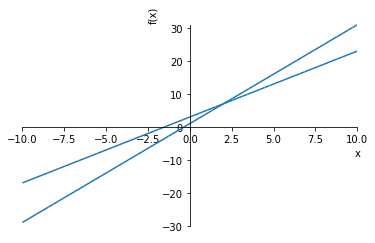

In [25]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(2*x+3, 3*x+1)

In [22]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
p = plot(2*x+3, 3*x+1, lengend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()